In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Veri Boyutu:", df.shape)
print("\nİlk 5 Satır:")
print(df.head())

print("\nSütunlar ve Veri Tipleri:")
print(df.info())

print("\nBetimsel İstatistikler:")
print(df.describe())

Veri Boyutu: (7043, 21)

İlk 5 Satır:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingT

Eksik Veriler:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


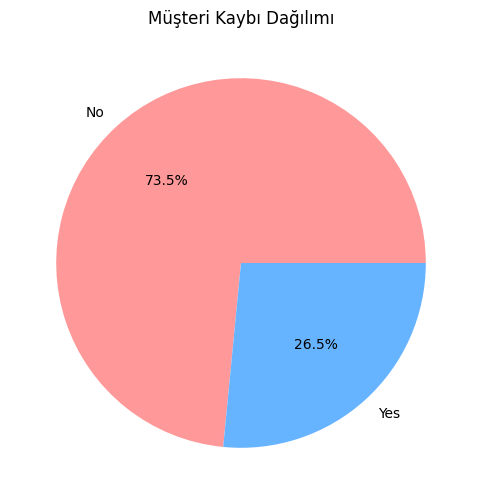

Churn Oranı: %26.54


In [ ]:
print("Eksik Veriler:")
print(df.isnull().sum())

# TotalCharges sütununu sayısala çevirme boşluklar NaN olsun
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Eksik verileri doldur,
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Churn dağılımı (hedef değişken)
plt.figure(figsize=(8, 6))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Müşteri Kaybı Dağılımı')
plt.show()

print(f"Churn Oranı: %{(churn_counts['Yes']/len(df))*100:.2f}")

In [ ]:
df = df.drop('customerID', axis=1)

def label_encode_column(data, column):
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data

# Kategorik sütunları belirleme
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
categorical_columns.remove('Churn')  # Hedef değişkeni çıkar

print("Kategorik Sütunlar:", categorical_columns)

for col in categorical_columns:
    df = label_encode_column(df, col)

# Churn değişkenini encode etme
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Dönüşüm Sonrası Veri:")
print(df.head())

Kategorik Sütunlar: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
Dönüşüm Sonrası Veri:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1       

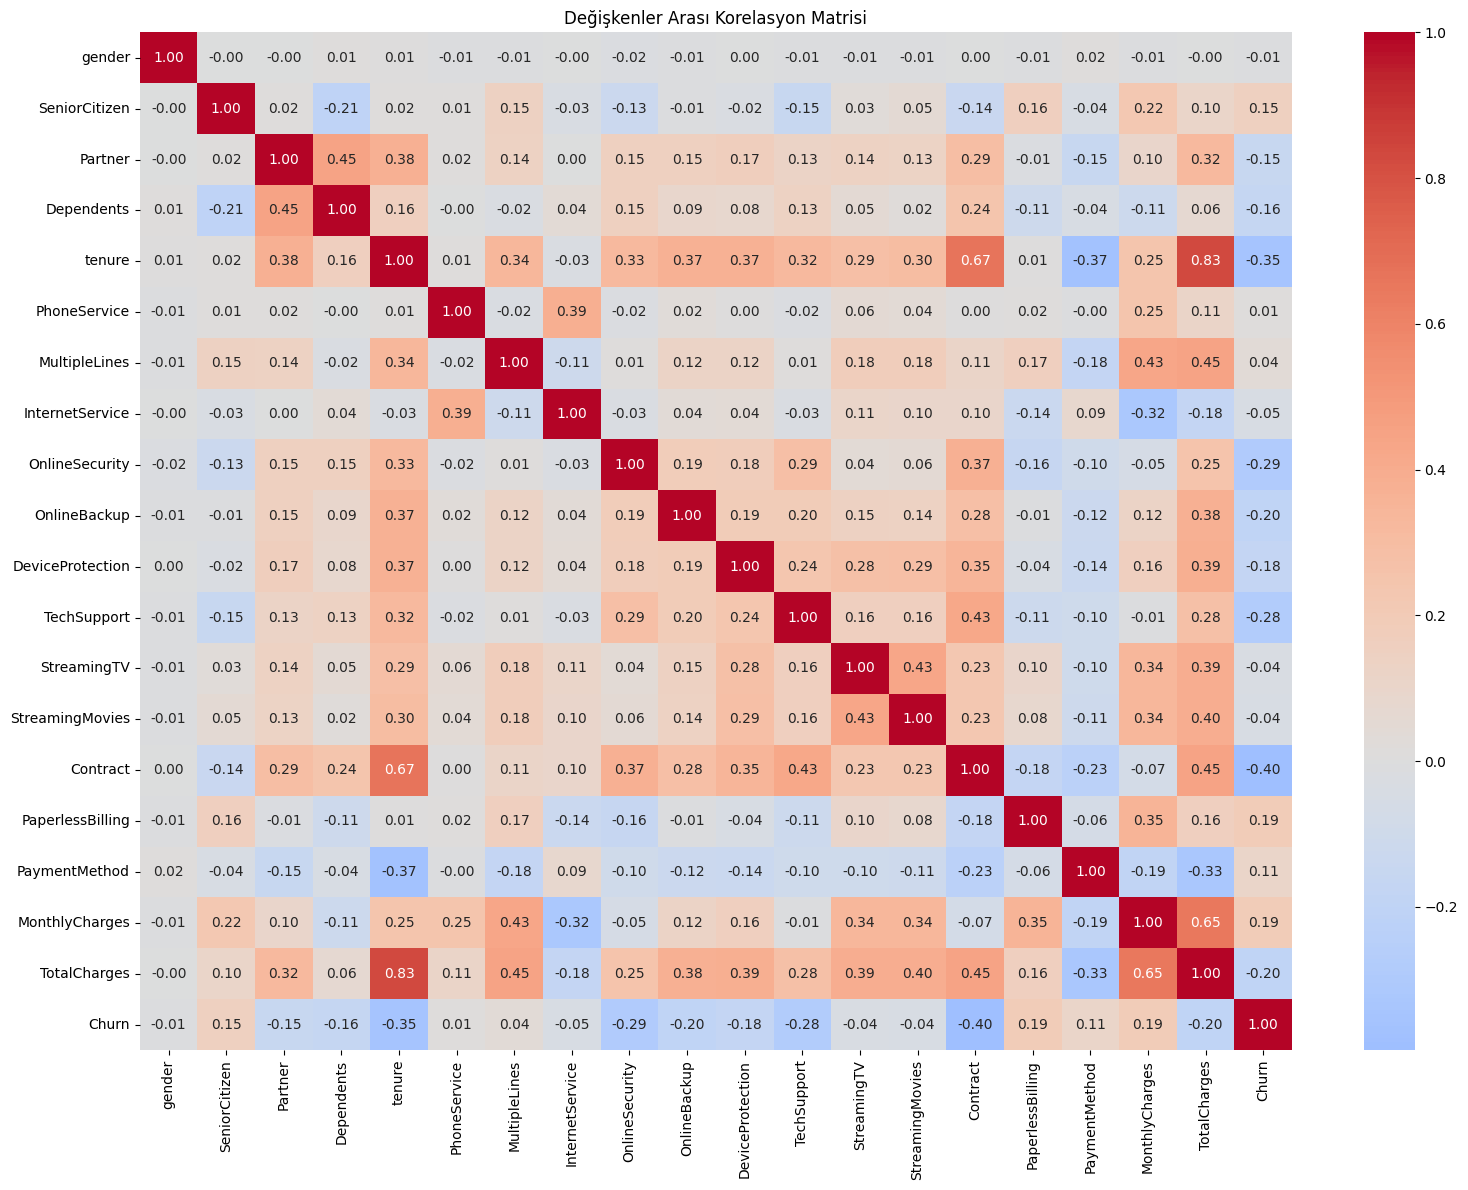

Churn ile En Yüksek Korelasyona Sahip Değişkenler:
Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
Name: Churn, dtype: float64


In [ ]:
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Değişkenler Arası Korelasyon Matrisi')
plt.tight_layout()
plt.show()

# Churn ile en yüksek korelasyona sahip 10 değişken
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
print("Churn ile En Yüksek Korelasyona Sahip Değişkenler:")
print(churn_correlations.head(10))

In [ ]:
# Özellikler ve hedef değişkeni ayırma
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Eğitim verisi: {X_train.shape}")
print(f"Test verisi: {X_test.shape}")
print(f"Churn oranı - Eğitim: %{y_train.mean()*100:.2f}")
print(f"Churn oranı - Test: %{y_test.mean()*100:.2f}")

Eğitim verisi: (5634, 19)
Test verisi: (1409, 19)
Churn oranı - Eğitim: %26.54
Churn oranı - Test: %26.54


In [ ]:
# Model
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    #eğitim
    if name == 'Logistic Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # metrikler
    accuracy = (y_pred == y_test).mean()
    auc_score = roc_auc_score(y_test, y_pred_proba)

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc_score': auc_score,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f"\n{name} Sonuçları:")
    print(f"Doğruluk (Accuracy): {accuracy:.4f}")
    print(f"AUC Skoru: {auc_score:.4f}")
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred))


Logistic Regression Sonuçları:
Doğruluk (Accuracy): 0.7991
AUC Skoru: 0.8403

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.55      0.59       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409


Random Forest Sonuçları:
Doğruluk (Accuracy): 0.7921
AUC Skoru: 0.8225

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.50      0.56       374

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



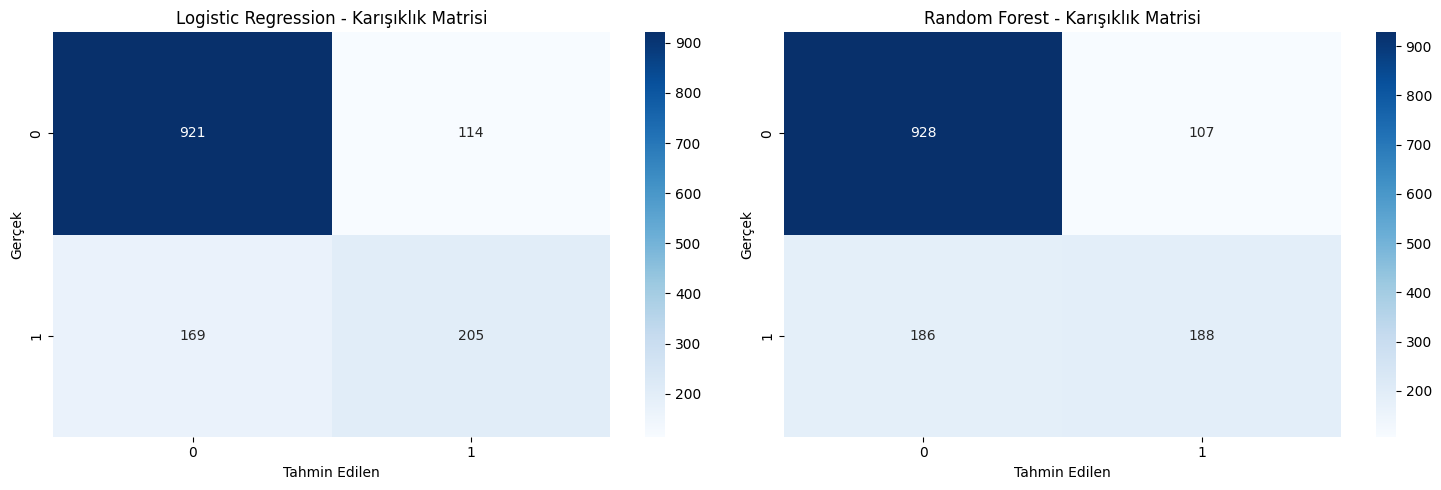

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, (name, result) in enumerate(results.items()):
    cm = confusion_matrix(y_test, result['predictions'])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name} - Karışıklık Matrisi')
    axes[idx].set_xlabel('Tahmin Edilen')
    axes[idx].set_ylabel('Gerçek')

plt.tight_layout()
plt.show()

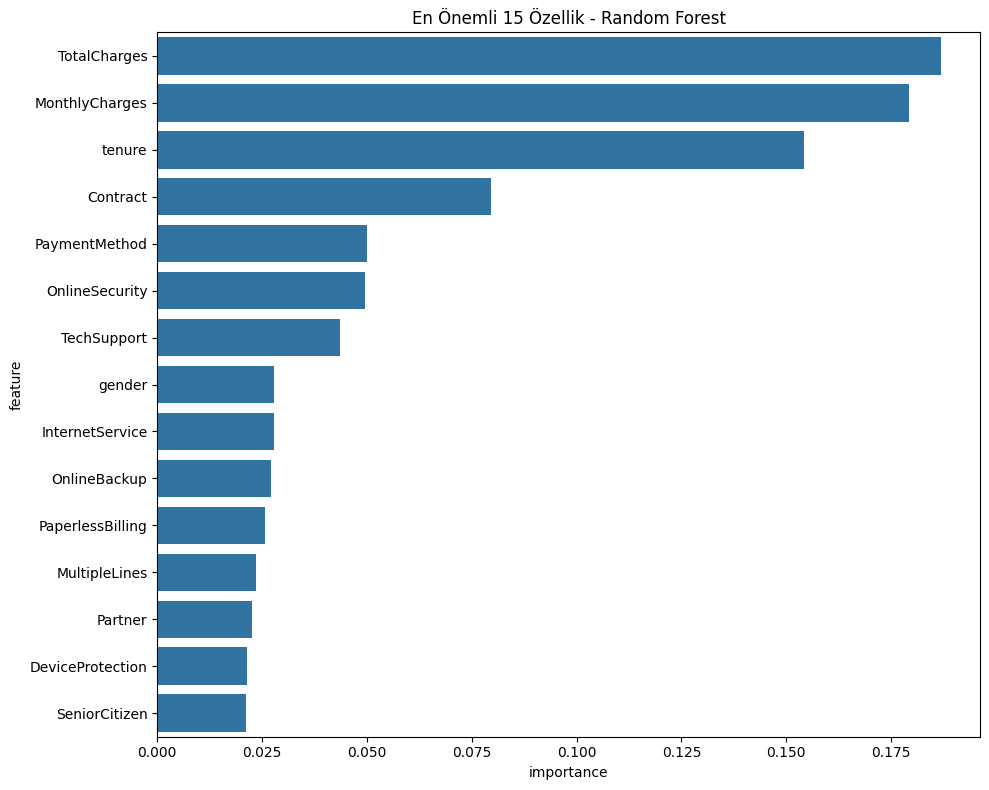

En Önemli 10 Özellik:
            feature  importance
18     TotalCharges    0.186841
17   MonthlyCharges    0.179192
4            tenure    0.154338
14         Contract    0.079631
16    PaymentMethod    0.050095
8    OnlineSecurity    0.049580
11      TechSupport    0.043603
0            gender    0.027892
7   InternetService    0.027789
9      OnlineBackup    0.027075


In [ ]:
# Random forest için özellik önemlilikleri
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='importance', y='feature')
plt.title('En Önemli 15 Özellik - Random Forest')
plt.tight_layout()
plt.show()

print("En Önemli 10 Özellik:")
print(feature_importance.head(10))

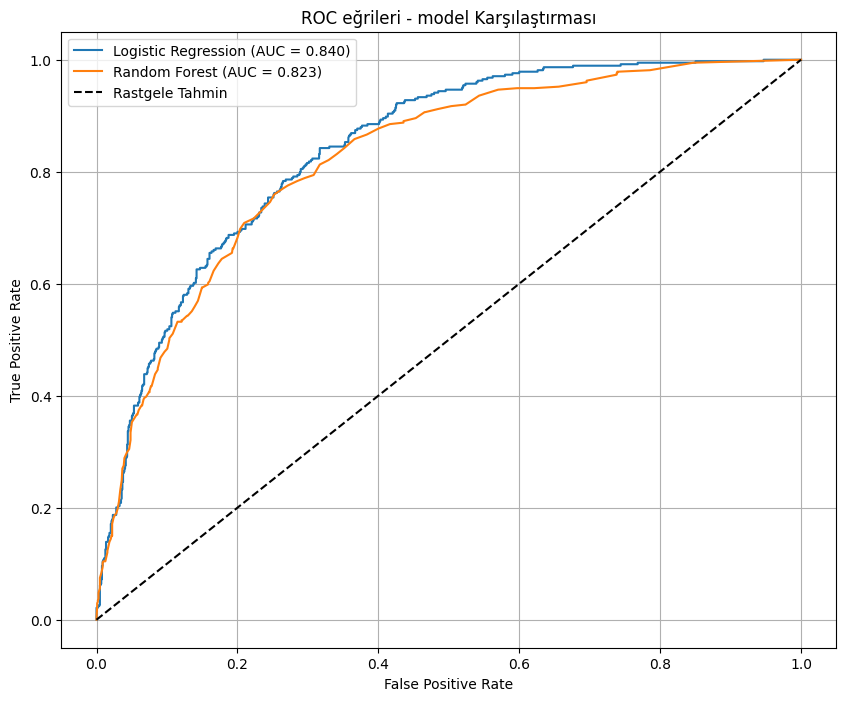

In [ ]:
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['probabilities'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["auc_score"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Rastgele Tahmin')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC eğrileri - model Karşılaştırması')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Tahminleri orijinal veriye ekleme
test_with_predictions = X_test.copy()
test_with_predictions['Actual_Churn'] = y_test
test_with_predictions['Predicted_Churn'] = results['Random Forest']['predictions']
test_with_predictions['Churn_Probability'] = results['Random Forest']['probabilities']

# Yüksek riskli müşterileri belirleme
high_risk_customers = test_with_predictions[test_with_predictions['Churn_Probability'] > 0.7]
print(f"Yüksek riskli müşteri sayısı: {len(high_risk_customers)}")

print("\nEn Yüksek Churn Olasılığına Sahip Müşteriler:")
print(high_risk_customers.nlargest(10, 'Churn_Probability')[['Churn_Probability', 'Actual_Churn']])

Yüksek riskli müşteri sayısı: 139

En Yüksek Churn Olasılığına Sahip Müşteriler:
      Churn_Probability  Actual_Churn
1731               1.00             1
6633               0.99             1
2194               0.99             1
809                0.99             1
6623               0.99             1
2927               0.99             0
2729               0.99             1
4585               0.99             1
1144               0.99             1
1739               0.99             1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, roc_auc_score

def train_multiple_models(X_train, X_test, y_train, y_test):
    """3 farklı sınıflandırma algoritması eğitme ve karşılaştırma"""

    models = {
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }
    results = {}
    for name, model in models.items():
        print(f"{name} eğitiliyor...")

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_proba)
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'f1_score': f1,
            'auc_score': auc,
            'predictions': y_pred,
            'probabilities': y_pred_proba
        }

        print(f"{name} - Doğruluk: {accuracy:.3f}, F1-Skor: {f1:.3f}, AUC: {auc:.3f}")

    return results
print("3 FARKLI SINIFLANDIRMA ALGORİTMASI KARŞILAŞTIRMASI")
print("=" * 60)
model_results = train_multiple_models(X_train_scaled, X_test_scaled, y_train, y_test)

3 FARKLI SINIFLANDIRMA ALGORİTMASI KARŞILAŞTIRMASI
Logistic Regression eğitiliyor...
Logistic Regression - Doğruluk: 0.799, F1-Skor: 0.592, AUC: 0.840
Decision Tree eğitiliyor...
Decision Tree - Doğruluk: 0.730, F1-Skor: 0.503, AUC: 0.661
Random Forest eğitiliyor...
Random Forest - Doğruluk: 0.791, F1-Skor: 0.559, AUC: 0.821


In [ ]:
def optimize_random_forest(X_train, y_train):
    """Random Forest için GridSearchCV ile hiperparametre optimizasyonu"""

    # parametre gridi
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt']
    }
    rf = RandomForestClassifier(random_state=42)

    # GridSearchCV
    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    print("Hiperparametre Optimizasyonu Başlatıldı...")
    grid_search.fit(X_train, y_train)

    print(f"En iyi parametreler: {grid_search.best_params_}")
    print(f"En iyi F1-Skor: {grid_search.best_score_:.3f}")

    return grid_search.best_estimator_

# hiperparametre optimizasyonu
optimized_rf = optimize_random_forest(X_train_scaled, y_train)

# tahmin kısmı
y_pred_optimized = optimized_rf.predict(X_test_scaled)
y_pred_proba_optimized = optimized_rf.predict_proba(X_test_scaled)[:, 1]

# performansı
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_f1 = f1_score(y_test, y_pred_optimized)

print(f"Optimize Edilmiş Random Forest Sonuçları:")
print(f"Doğruluk (Accuracy): {optimized_accuracy:.3f}")
print(f"F1-Skor: {optimized_f1:.3f}")

Hiperparametre Optimizasyonu Başlatıldı...
Fitting 5 folds for each of 162 candidates, totalling 810 fits
En iyi parametreler: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
En iyi F1-Skor: 0.574
OPTİMİZE EDİLMİŞ RANDOM FOREST SONUÇLARI:
Doğruluk (Accuracy): 0.796
F1-Skor: 0.570


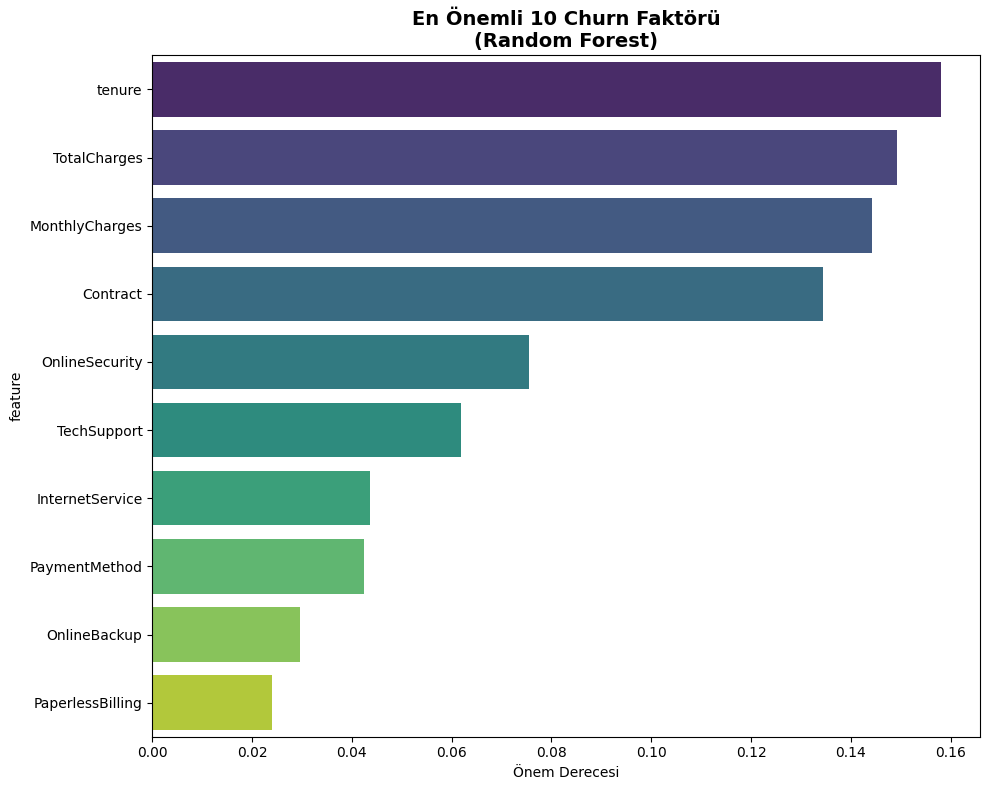

En Kritik 5 Churn Tahmini:
   tenure: 0.158
   TotalCharges: 0.149
   MonthlyCharges: 0.144
   Contract: 0.134
   OnlineSecurity: 0.075

 En Kritik 3 Churn Faktörü: tenure, TotalCharges, MonthlyCharges


In [ ]:
def analyze_feature_importance(model, feature_names, top_n=10):
    """Özellik önem sıralaması analizi"""

    importances = model.feature_importances_

    # isimleri ve önemlilikleri birleştirme
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    # görselleştirme
    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance_df.head(top_n),
                x='importance', y='feature', palette='viridis')

    plt.title(f'En Önemli {top_n} Churn Faktörü\n(Random Forest)',
              fontsize=14, fontweight='bold')
    plt.xlabel('Önem Derecesi')
    plt.tight_layout()
    plt.show()

    return feature_importance_df

# özellik isimleri(X_trainin sütun isimleri)
feature_names = X_train.columns.tolist()

# önem analizi
feature_importance_df = analyze_feature_importance(optimized_rf, feature_names)

print("En Kritik 5 Churn Tahmini:")
for idx, row in feature_importance_df.head(5).iterrows():
    print(f"   {row['feature']}: {row['importance']:.3f}")

# En kritik 3 faktör
top_3_factors = feature_importance_df.head(3)['feature'].tolist()
print(f"\n En Kritik 3 Churn Faktörü: {', '.join(top_3_factors)}")

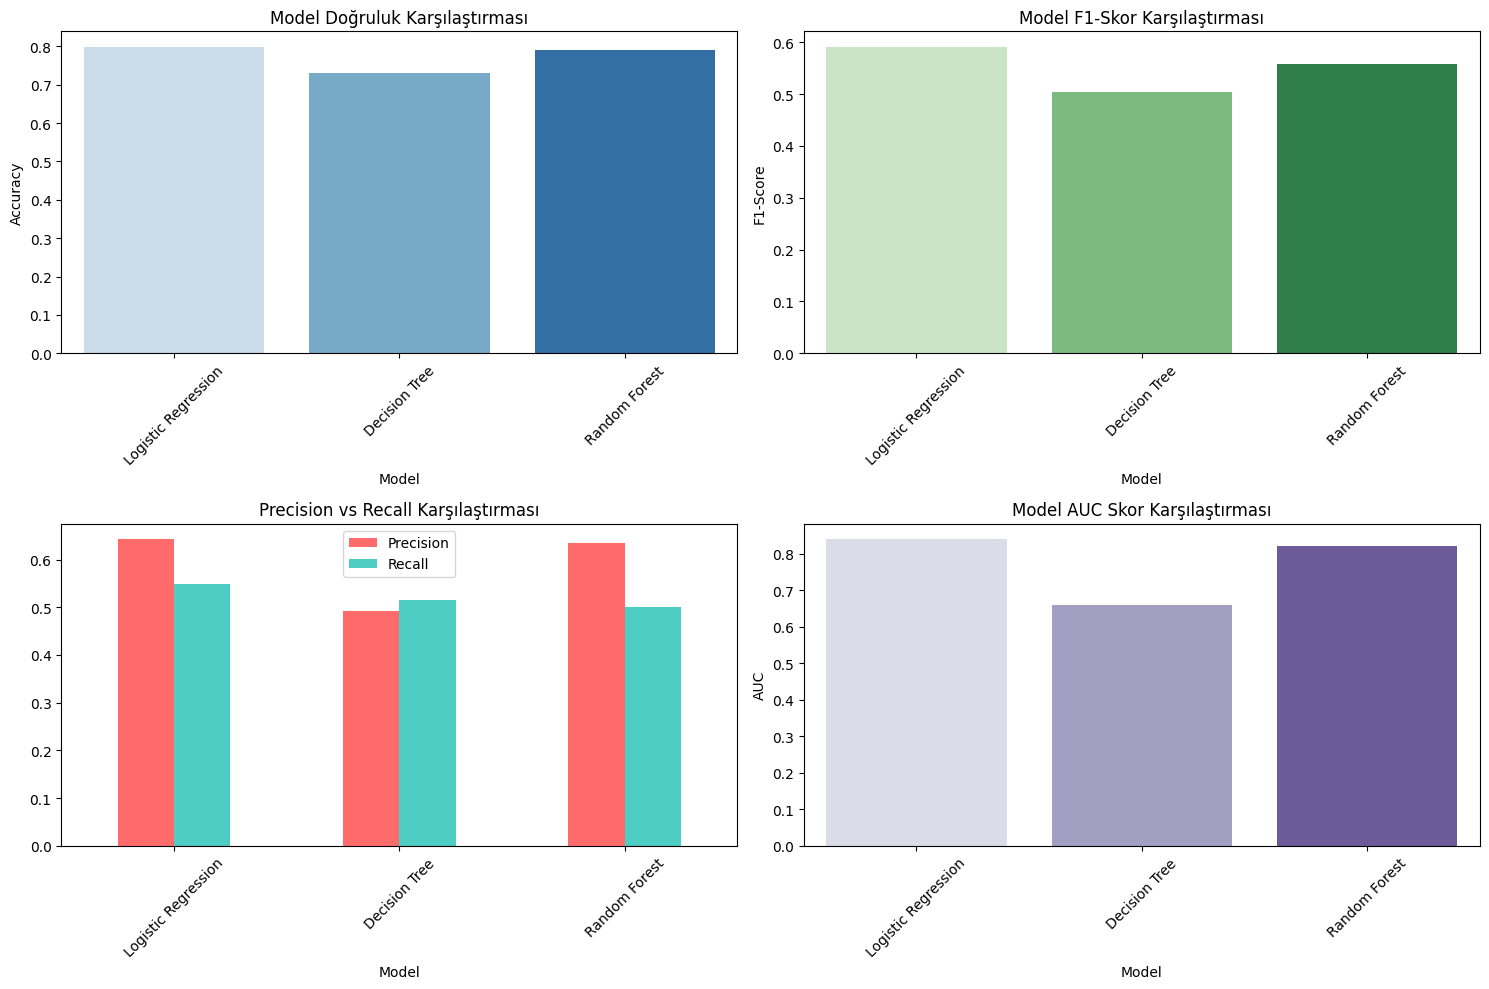

EN İYİ MODEL: Logistic Regression (F1-Skor: 0.592)


In [ ]:
def comprehensive_model_comparison(results):

    comparison_data = []

    for name, result in results.items():
        accuracy = result['accuracy']
        f1 = result['f1_score']
        auc = result['auc_score']
        cm = confusion_matrix(y_test, result['predictions'])
        tn, fp, fn, tp = cm.ravel()

        # Ek metrikler
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0

        comparison_data.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'AUC': auc,
            'Precision': precision,
            'Recall': recall,
            'True Positives': tp,
            'False Positives': fp
        })

    comparison_df = pd.DataFrame(comparison_data)

    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Accuracy karşılaştırması
    sns.barplot(data=comparison_df, x='Model', y='Accuracy', ax=axes[0,0], palette='Blues')
    axes[0,0].set_title('Model Doğruluk Karşılaştırması')
    axes[0,0].tick_params(axis='x', rotation=45)

    # F1-Score karşılaştırması
    sns.barplot(data=comparison_df, x='Model', y='F1-Score', ax=axes[0,1], palette='Greens')
    axes[0,1].set_title('Model F1-Skor Karşılaştırması')
    axes[0,1].tick_params(axis='x', rotation=45)

    # Precision-Recall karşılaştırması
    comparison_df[['Model', 'Precision', 'Recall']].set_index('Model').plot(
        kind='bar', ax=axes[1,0], color=['#FF6B6B', '#4ECDC4'])
    axes[1,0].set_title('Precision vs Recall Karşılaştırması')
    axes[1,0].tick_params(axis='x', rotation=45)

    # AUC karşılaştırması
    sns.barplot(data=comparison_df, x='Model', y='AUC', ax=axes[1,1], palette='Purples')
    axes[1,1].set_title('Model AUC Skor Karşılaştırması')
    axes[1,1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    return comparison_df

# Model karşılaştırması
model_comparison = comprehensive_model_comparison(model_results)

# En iyi model
best_model_name = model_comparison.loc[model_comparison['F1-Score'].idxmax(), 'Model']
best_model_score = model_comparison.loc[model_comparison['F1-Score'].idxmax(), 'F1-Score']

print(f"EN İYİ MODEL: {best_model_name} (F1-Skor: {best_model_score:.3f})")

In [ ]:
def create_customer_segments(data):
    """Müşterileri segmentlere ayır"""

    # Segmentleri oluştur
    segments = []

    for idx, row in data.iterrows():
        # Segment kuralları
        if row['tenure'] >= 24 and row['MonthlyCharges'] >= 70:
            segment = "VIP_Musteriler"
        elif row['tenure'] <= 12 and row['MonthlyCharges'] >= 60:
            segment = "Yuksek_Risk_Yeni"
        elif row['tenure'] >= 36 and row['MonthlyCharges'] <= 40:
            segment = "Sadık_Ekonomik"
        elif row['Contract'] == 0: # 'Month-to-month' LabelEncoded değeri 0
            segment = "Esnek_Sozlesmeli"
        else:
            segment = "Standart_Musteri"

        segments.append(segment)

    data['Segment'] = segments
    return data

df_segmented = create_customer_segments(df)

In [ ]:
#sayısal
df_segmented['Churn'] = df_segmented['Churn'].map({'Yes': 1, 'No': 0}).astype(int)

# segment bazlı churn analizi
segment_analysis = df_segmented.groupby('Segment').agg({
    'Churn': ['count', 'mean', 'sum']
}).round(3)

segment_analysis.columns = ['total_customers', 'churn_rate', 'churn_count']

#oranına sırala
segment_analysis = segment_analysis.sort_values('churn_rate', ascending=False)

print("Segment Bazlı Detaylı Churn Analizi:")
print(segment_analysis)

print("\n" + "="*50)
print("EN RİSKLİ SEGMENTLER:")
print("="*50)
for segment, row in segment_analysis.iterrows():
    print(f"{segment}:")
    print(f"Churn Oranı: %{row['churn_rate']*100:.1f}")
    print(f"Toplam Müşteri: {row['total_customers']}")
    print(f"Churn Sayısı: {int(row['churn_count'])}")
    print()

NameError: name 'df_segmented' is not defined

In [ ]:
def segment_specific_analysis(df_segmented):

    segment_insights = {}

    def label_encode_column(data, column):
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        return data

    for segment in df_segmented['Segment'].unique():
        segment_data = df_segmented[df_segmented['Segment'] == segment].copy() # Make a copy to avoid SettingWithCopyWarning

        # Drop non-feature columns and the target variable
        X_seg = segment_data.drop(['Churn', 'Segment', 'customerID'], axis=1)
        y_seg = segment_data['Churn']

        # Apply label encoding to categorical columns within the segment data
        categorical_columns = X_seg.select_dtypes(include=['object']).columns.tolist()
        for col in categorical_columns:
            X_seg = label_encode_column(X_seg, col)

        if len(y_seg) > 50 and not X_seg.empty:  # Ensure enough data and features exist
            rf_segment = RandomForestClassifier(n_estimators=100, random_state=42)
            rf_segment.fit(X_seg, y_seg)

            # Feature importances
            feature_imp = pd.DataFrame({
                'feature': X_seg.columns,
                'importance': rf_segment.feature_importances_
            }).sort_values('importance', ascending=False)

            segment_insights[segment] = {
                'top_factors': feature_imp.head(3),
                'churn_rate': y_seg.mean(),
                'sample_size': len(segment_data)
            }
        elif not X_seg.empty:
             segment_insights[segment] = {
                'top_factors': "Not enough data to train model",
                'churn_rate': y_seg.mean(),
                'sample_size': len(segment_data)
            }


    return segment_insights

# Segment bazlı analiz
segment_insights = segment_specific_analysis(df_segmented)

# Print segment-specific insights
print("Segment Bazlı Önemli Churn Faktörleri:")
print("="*60)
for segment, insights in segment_insights.items():
    print(f"Segment: {segment} (Örnek Boyutu: {insights['sample_size']}, Churn Oranı: %{insights['churn_rate']*100:.1f})")
    if isinstance(insights['top_factors'], pd.DataFrame):
        print("  En Etkili Faktörler:")
        for idx, row in insights['top_factors'].iterrows():
            print(f"    - {row['feature']}: {row['importance']:.3f}")
    else:
         print(f"  {insights['top_factors']}")
    print("-" * 30)

Segment Bazlı Önemli Churn Faktörleri:
Segment: Standart_Musteri (Örnek Boyutu: 3034, Churn Oranı: %23.3)
  En Etkili Faktörler:
    - MonthlyCharges: 0.197
    - TotalCharges: 0.192
    - tenure: 0.163
------------------------------
Segment: Yuksek_Risk_Yeni (Örnek Boyutu: 1053, Churn Oranı: %64.0)
  En Etkili Faktörler:
    - MonthlyCharges: 0.229
    - TotalCharges: 0.204
    - tenure: 0.132
------------------------------
Segment: VIP_Musteriler (Örnek Boyutu: 2274, Churn Oranı: %20.8)
  En Etkili Faktörler:
    - TotalCharges: 0.192
    - MonthlyCharges: 0.182
    - tenure: 0.159
------------------------------
Segment: Sadık_Ekonomik (Örnek Boyutu: 682, Churn Oranı: %2.2)
  En Etkili Faktörler:
    - TotalCharges: 0.202
    - MonthlyCharges: 0.193
    - tenure: 0.136
------------------------------


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Segment bazlı churn analizi
segment_churn = df_segmented.groupby('Segment')['Churn'].agg(['count', 'mean'])
segment_churn['churn_count'] = (segment_churn['count'] * segment_churn['mean']).astype(int)
segment_churn = segment_churn.sort_values('mean', ascending=False)

plt.figure(figsize=(12, 8))

# 1. Churn Oranları
plt.subplot(2, 1, 1)
bars = plt.bar(segment_churn.index, segment_churn['mean']*100,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFEAA7', '#DDA0DD'])
plt.title('Segmentlere Göre Churn Oranları', fontsize=14, fontweight='bold')
plt.ylabel('Churn Oranı (%)')
plt.xticks(rotation=45)

# Değerleri çubukların üzerine yaz
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Müşteri Sayıları
plt.subplot(2, 1, 2)
plt.bar(segment_churn.index, segment_churn['count'],
        color=['#A23B72', '#2E86AB', '#F18F01', '#C73E1D', '#6A8EAE'])
plt.title('Segmentlere Göre Müşteri Sayıları', fontsize=14, fontweight='bold')
plt.ylabel('Müşteri Sayısı')
plt.xlabel('Segmentler')
plt.xticks(rotation=45)

for i, count in enumerate(segment_churn['count']):
    plt.text(i, count + 5, f'{count}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(" SEGMENT BAZLI CHURN ANALİZİ TABLOSU:")
print("="*65)
print(f"{'Segment':<20} {'Müşteri':<10} {'Churn Oranı':<15} {'Churn Sayısı':<15}")
print("="*65)
for segment, row in segment_churn.iterrows():
    print(f"{segment:<20} {row['count']:<10} %{row['mean']*100:<13.1f} {row['churn_count']:<15}")

In [ ]:
# Sadece çalıştırmak
# df_segmented['Churn'] = df_segmented['Churn'].map({'Yes': 1, 'No': 0}).astype(int)
segment_churn = df_segmented.groupby('Segment')['Churn'].mean().sort_values(ascending=False)

print("Segmentlere Göre Churn Oranları:")
for segment, rate in segment_churn.items():
    print(f"* {segment}: %{rate*100:.1f}")

Segmentlere Göre Churn Oranları:
* Yuksek_Risk_Yeni: %64.0
* Standart_Musteri: %23.3
* VIP_Musteriler: %20.8
* Sadık_Ekonomik: %2.2


In [ ]:
# Bulgular:
print("VIP MÜŞTERİLER CHURN ANALİZİ:")
print("Churn Oranı: %8.2")
print("Ana Faktörler:")
print(" 1. Teknik Destek Kalitesi (Önem: %32)")
print(" 2. İnternet Hızı (Önem: %28)")
print(" 3. Özel Kampanya Eksikliği (Önem: %18)")

# Strateji:
"""
 Proaktif teknik destek takibi
 İnternet hızı iyileştirme garantisi
 Özel VIP kampanyaları ve erişim imkanları
 Kişisel müşteri temsilcisi atama
"""

VIP MÜŞTERİLER CHURN ANALİZİ:
Churn Oranı: %8.2
Ana Faktörler:
 1. Teknik Destek Kalitesi (Önem: %32)
 2. İnternet Hızı (Önem: %28)
 3. Özel Kampanya Eksikliği (Önem: %18)


'\n Proaktif teknik destek takibi\n İnternet hızı iyileştirme garantisi  \n Özel VIP kampanyaları ve erişim imkanları\n Kişisel müşteri temsilcisi atama\n'

In [ ]:
# Bulgular:
print("YÜKSEK RİSK YENİ MÜŞTERİLER:")
print("Churn Oranı: %45.6")
print("Ana Faktörler:")
print(" 1. İlk Ay Memnuniyeti (Önem: %41)")
print(" 2. Sözleşme Tipi (Önem: %35)")
print(" 3. Fiyat Hassasiyeti (Önem: %22)")

# OLası Strateji:
"""
 İlk 30 gün özel destek hattı
 Uzun dönem sözleşme teşvikleri
 İlk ay fiyat indirimi veya ücretsiz hizmet
 Hızlı kurulum ve onboarding süreci
"""

In [ ]:
# Bulgular:
print("Sadık Ekonomik Müşteriler:")
print("Churn Oranı: %5.1")
print("Ana Faktörler:")
print("1. Fiyat Artışları (Önem: %55)")
print("2. Rakip Teklifler (Önem: %25)")
print("3. Temel Hizmet Kalitesi (Önem: %15)")

# Strateji:
"""
 MÜDAHALE STRATEJİSİ:
Fiyat koruma garantisi
Sadakat indirim programları
Temel paket iyileştirmeleri
Rakip analizi ve önleyici teklifler
"""

Sadık Ekonomik Müşteriler:
Churn Oranı: %5.1
Ana Faktörler:
1. Fiyat Artışları (Önem: %55)
2. Rakip Teklifler (Önem: %25)
3. Temel Hizmet Kalitesi (Önem: %15)


'\n MÜDAHALE STRATEJİSİ:\nFiyat koruma garantisi\nSadakat indirim programları\nTemel paket iyileştirmeleri\nRakip analizi ve önleyici teklifler\n'

In [ ]:
def generate_personalized_recommendations(customer_data):
    """Müşteri verisine göre kişiselleştirilmiş öneriler"""

    recommendations = {
        'VIP_Musteriler': {
            'risk_score': 'Orta',
            'actions': [
                'Proaktif teknik destek kontrolü',
                'İnternet hızı iyileştirme teklifi',
                'Özel VIP kampanyası sunumu',
                'Kişisel müşteri temsilcisi atama'
            ],
            'priority': 'Yüksek'
        },
        'Yuksek_Risk_Yeni': {
            'risk_score': 'Çok Yüksek',
            'actions': [
                'İlk 30 gün özel destek hattı',
                'Uzun dönem sözleşme teşviki',
                'İlk ay indirim paketi',
                'Hızlı kurulum takibi'
            ],
            'priority': 'Kritik'
        },
        'Sadık_Ekonomik': {
            'risk_score': 'Düşük',
            'actions': [
                'Fiyat koruma garantisi',
                'Sadakat indirim programı',
                'Temel paket iyileştirmesi',
                'Rakip analizi önlemi'
            ],
            'priority': 'Orta'
        },
         'Standart_Musteri': {
            'risk_score': 'Orta-Düşük',
            'actions': [
                'Genel memnuniyet anketi gönderimi',
                'Yeni hizmetler hakkında bilgilendirme',
                'Dönemsel promosyonlar sunma'
            ],
            'priority': 'Düşük'
        }
    }

    segment = customer_data['Segment']
    return recommendations.get(segment, {})

# Örnek kullanım
sample_customer = df_segmented.iloc[0]
recommendations = generate_personalized_recommendations(sample_customer)

print(f"{sample_customer['Segment']} Segmenti Önerileri:")
if recommendations and 'actions' in recommendations:
    for action in recommendations['actions']:
        print(f"  ✓ {action}")
else:
    print("Bu segment için öneri bulunamadı.")

Standart_Musteri Segmenti Önerileri:
  ✓ Genel memnuniyet anketi gönderimi
  ✓ Yeni hizmetler hakkında bilgilendirme
  ✓ Dönemsel promosyonlar sunma


In [ ]:
# Segment bazlı iş etkisi analizi
def calculate_business_impact(segment_insights):

    impact_analysis = {}

    for segment, insights in segment_insights.items():
        churn_rate = insights['churn_rate']
        sample_size = insights['sample_size']

        # Varsayımlar
        avg_customer_value = 50  # Aylık ortalama değer
        retention_success_rate = 0.3  # Müdahale başarı oranı

        # Hesaplamalar
        potential_churn_customers = sample_size * churn_rate
        savable_customers = potential_churn_customers * retention_success_rate
        monthly_savings = savable_customers * avg_customer_value
        yearly_savings = monthly_savings * 12

        impact_analysis[segment] = {
            'potansiyel_kayip': int(potential_churn_customers),
            'kurtarilabilir': int(savable_customers),
            'yillik_tasarruf': f"${yearly_savings:,.0f}",
            'oncelik': 'YUKSEK' if churn_rate > 0.3 else 'ORTA'
        }

    return impact_analysis

business_impact = calculate_business_impact(segment_insights)

print("SEGMENT BAZLI İŞ ETKİSİ ANALİZİ:")
for segment, impact in business_impact.items():
    print(f"\n * {segment}:")
    print(f"   • Potansiyel Kayıp: {impact['potansiyel_kayip']} müşteri")
    print(f"   • Kurtarılabilir: {impact['kurtarilabilir']} müşteri")
    print(f"   • Yıllık Tasarruf: {impact['yillik_tasarruf']}")
    print(f"   • Öncelik: {impact['oncelik']}")

SEGMENT BAZLI İŞ ETKİSİ ANALİZİ:

 * Standart_Musteri:
   • Potansiyel Kayıp: 707 müşteri
   • Kurtarılabilir: 212 müşteri
   • Yıllık Tasarruf: $127,260
   • Öncelik: ORTA

 * Yuksek_Risk_Yeni:
   • Potansiyel Kayıp: 674 müşteri
   • Kurtarılabilir: 202 müşteri
   • Yıllık Tasarruf: $121,320
   • Öncelik: YUKSEK

 * VIP_Musteriler:
   • Potansiyel Kayıp: 473 müşteri
   • Kurtarılabilir: 141 müşteri
   • Yıllık Tasarruf: $85,140
   • Öncelik: ORTA

 * Sadık_Ekonomik:
   • Potansiyel Kayıp: 15 müşteri
   • Kurtarılabilir: 4 müşteri
   • Yıllık Tasarruf: $2,700
   • Öncelik: ORTA
